# Tumor Classification with K Nearest Neighbor (KNN)

## 1. Define the Problem¶
- Objective: Classify tumor use KNN model
- Outcome: Identify the target variable, which is the class of the tumor

## 2. Get Dataset
- tumor.csv

- Data Exploration

In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Define a random seed to reproduce any random process
rs = 123

In [6]:
# Read datast in csv format
dataset_file = 'tumor.csv'
tumor_df = pd.read_csv(dataset_file)

In [7]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [8]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [10]:
tumor_df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


<Axes: xlabel='Class'>

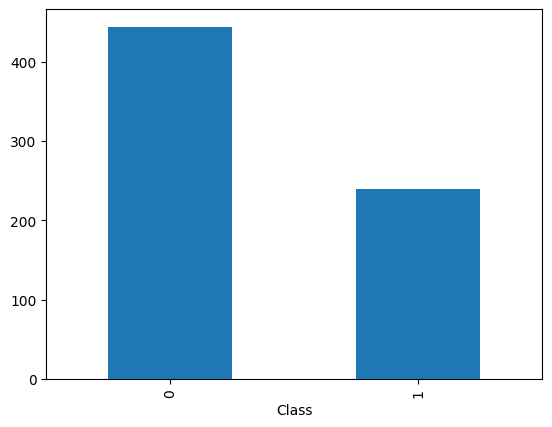

In [11]:
# Class distribution
tumor_df['Class'].value_counts().plot(kind='bar')

## 3. Preprocess Data
- handling missing data
- Encode categories if not yet encoded

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
tumor_df['Class'] = label_encoder.fit_transform(tumor_df['Class'])

- Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = tumor_df.drop('Class', axis=1)
y = tumor_df['Class']
X_scaled = scaler.fit_transform(X)

- Split dataset into train and test data, test size 20%

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4. Exploratoray Data Analysis EDA

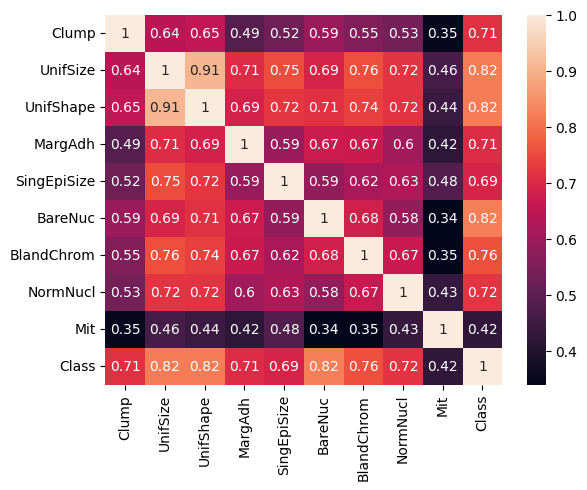

In [18]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 sns.heatmap(tumor_df.corr(), annot=True)
 plt.show()

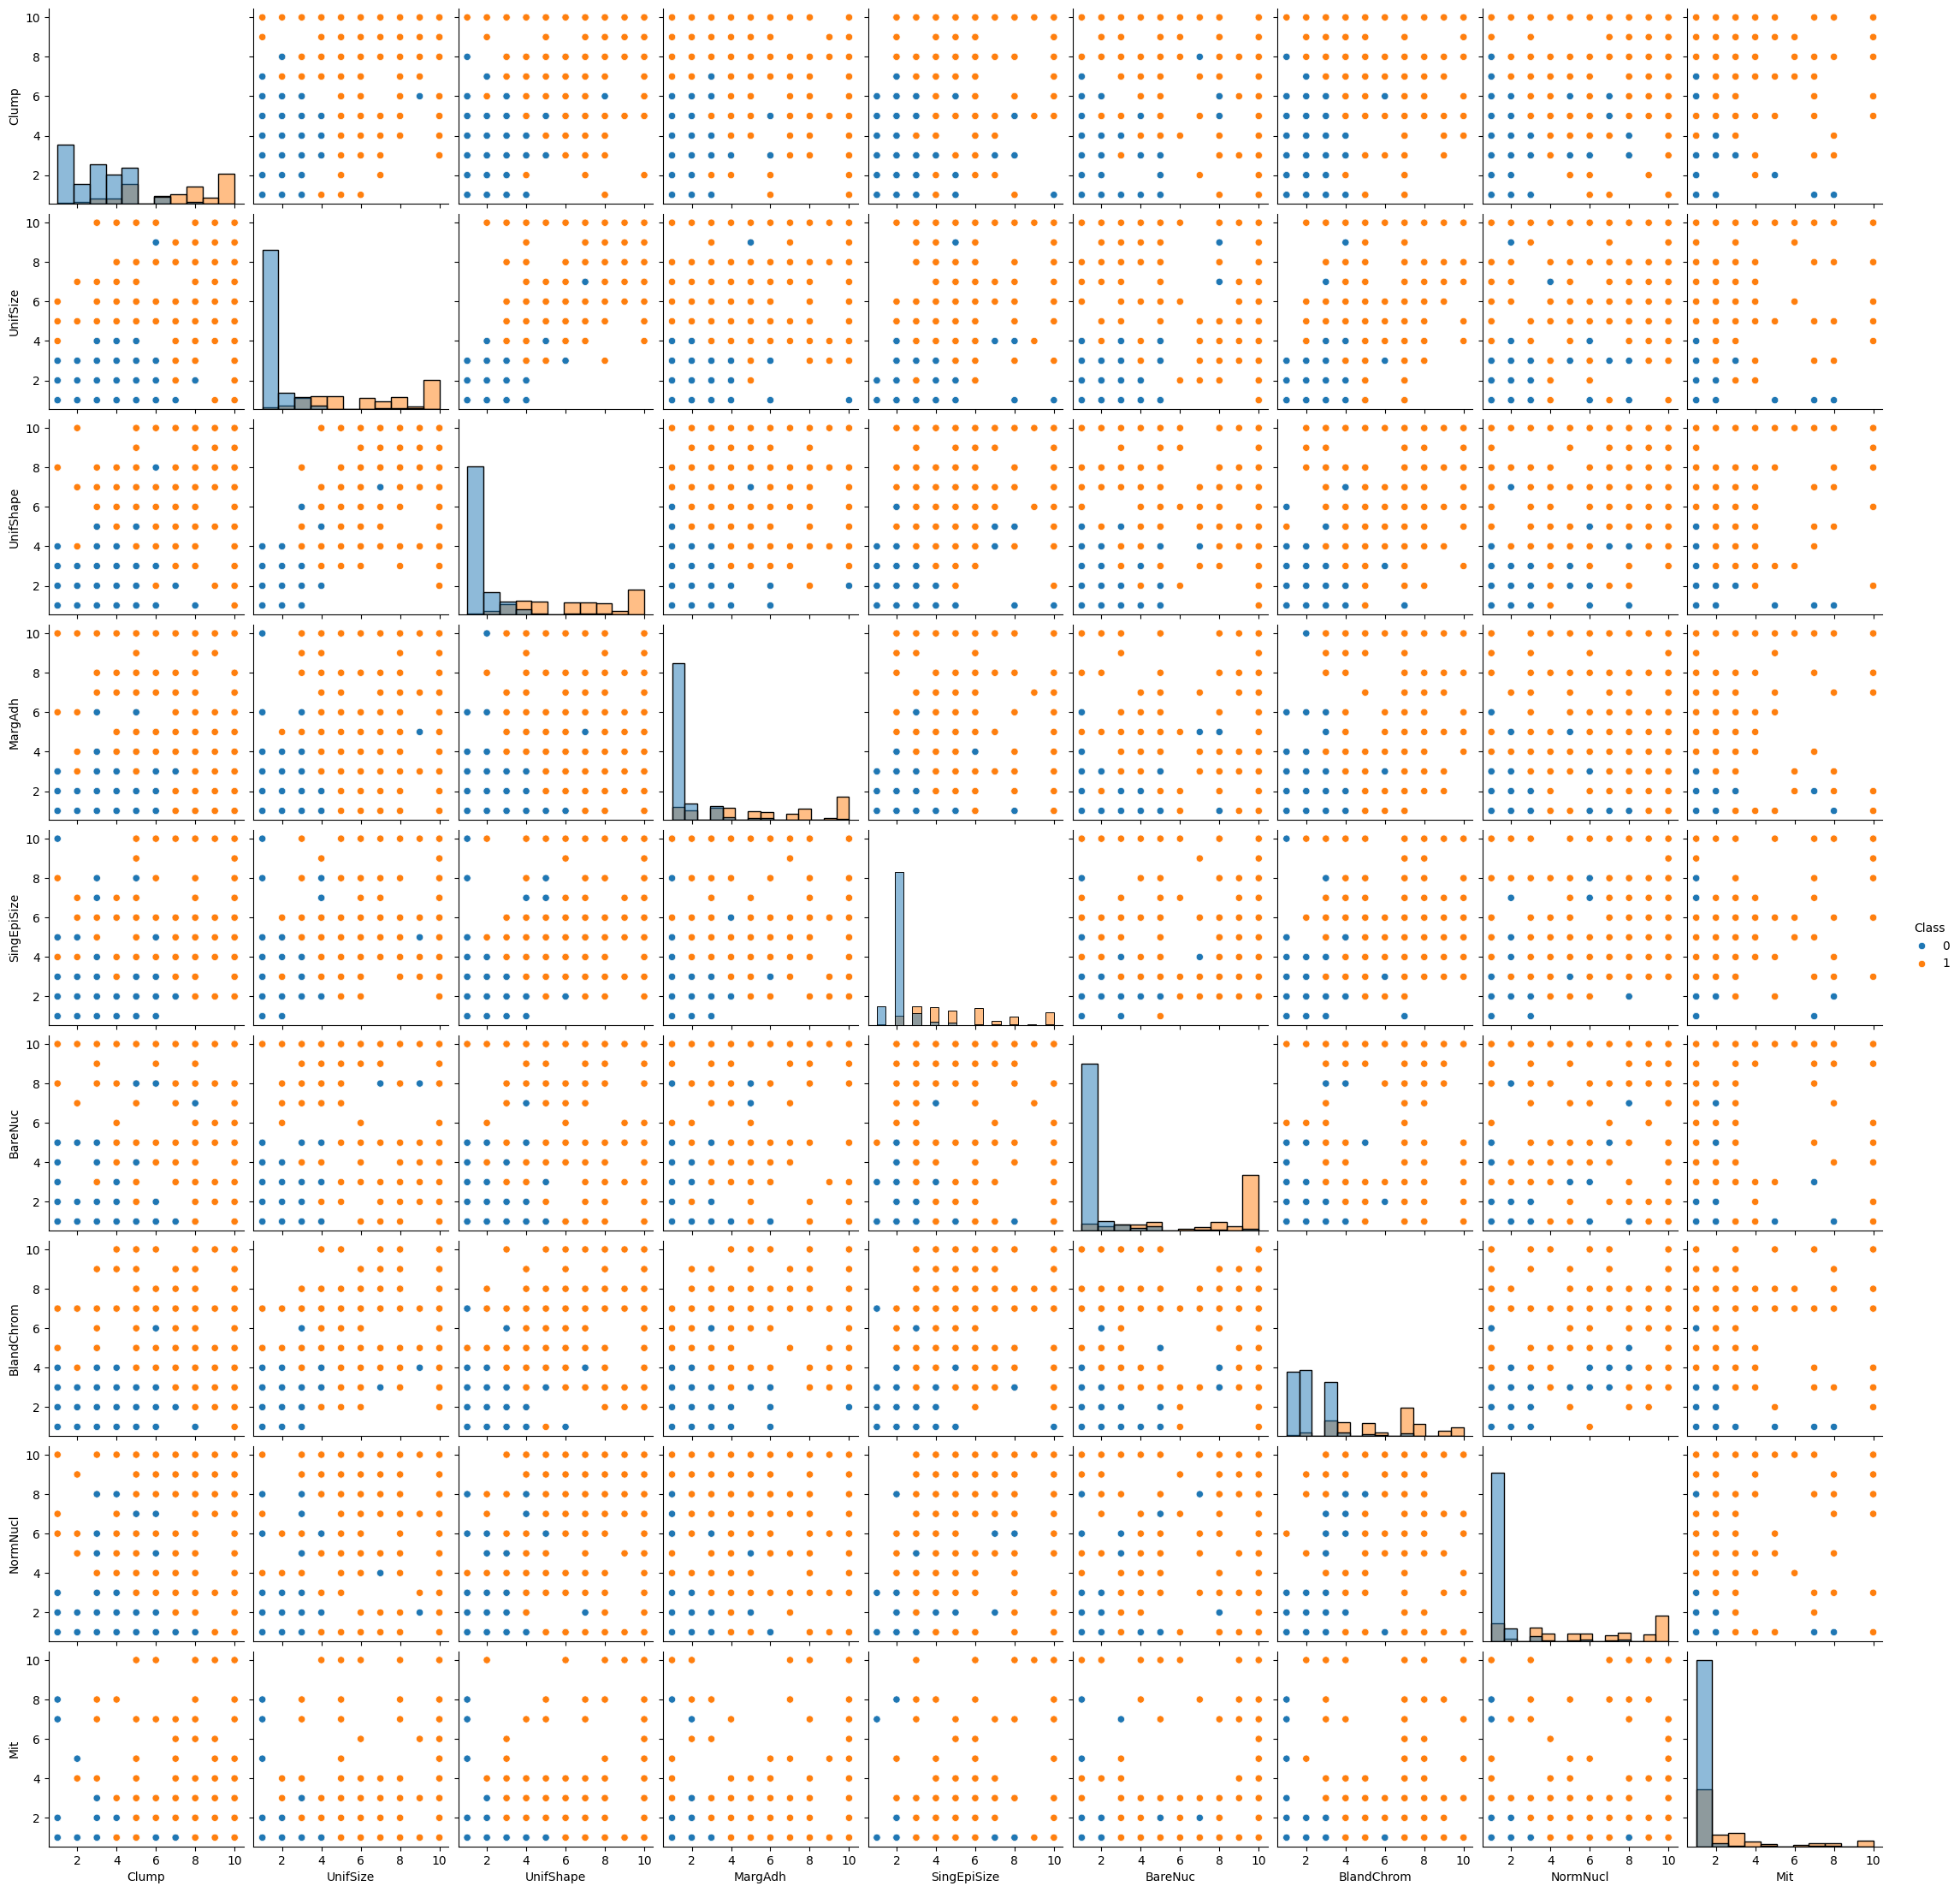

In [21]:
# sns.pairplot(tumor_df, hue='Class')
sns.pairplot(tumor_df, hue='Class', diag_kind='hist')
plt.show()

## 5 Feature Engineering

- Apply PCA

In [42]:
#apply PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = tumor_df['Class']

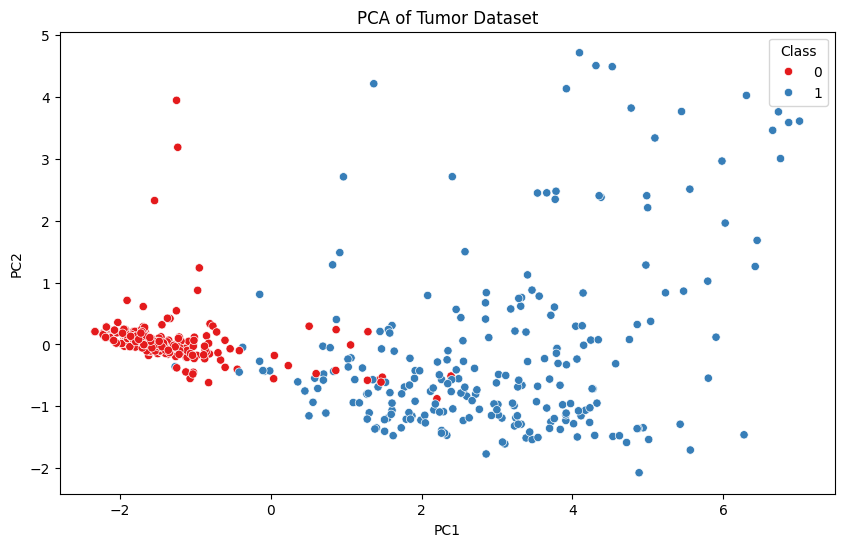

In [51]:
# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1')
plt.title('PCA of Tumor Dataset')
plt.show()

- Train a Random Forest model to get feature importances

In [49]:
# Train a Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  #tumor_df['Class'])

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        79
           1       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



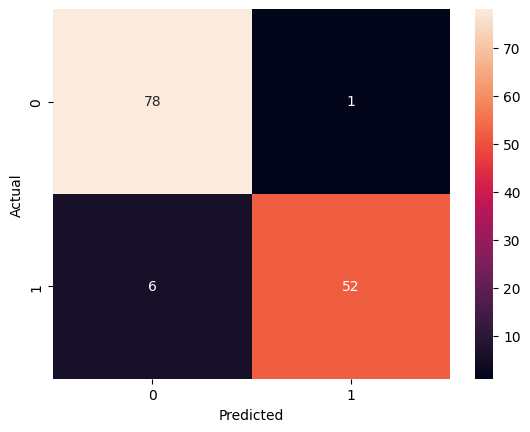

In [40]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Get feature importances

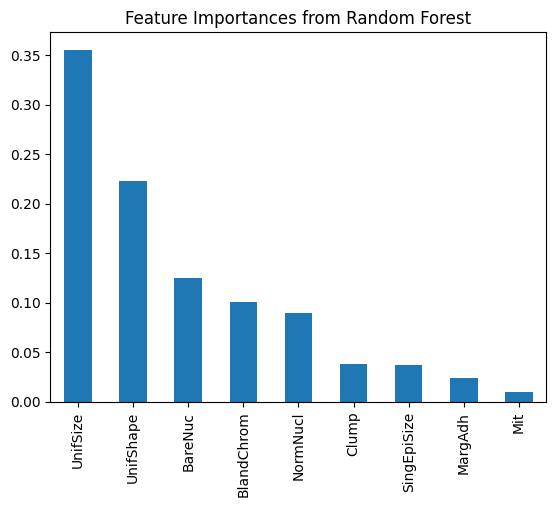

In [50]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit'])
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.show()

- Partial Dependence Plots

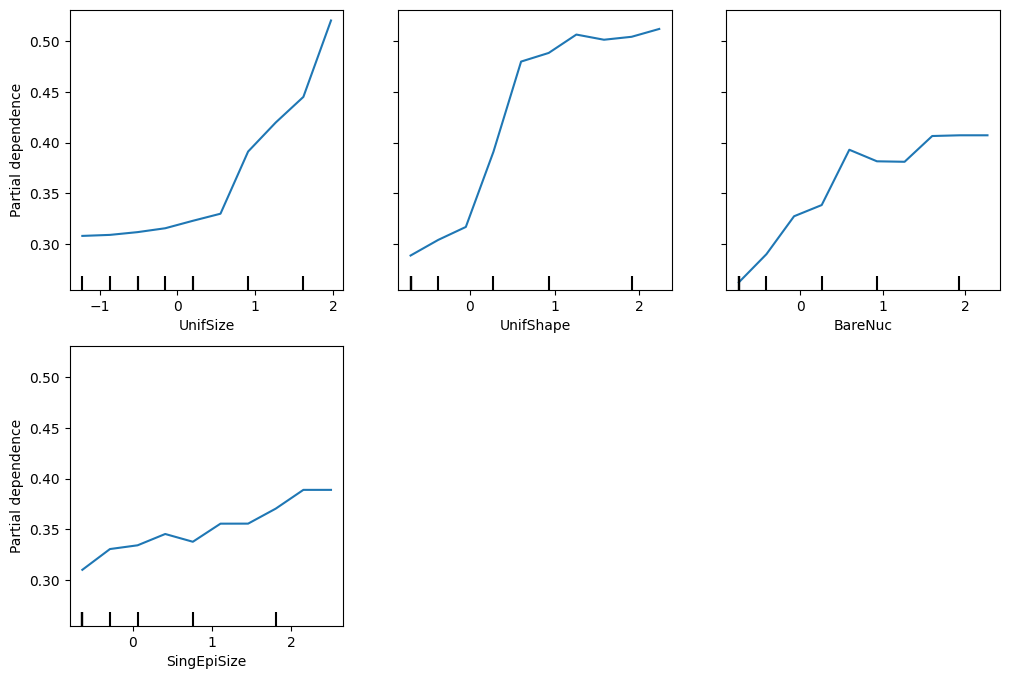

In [46]:

# Partial Dependence Plots
features = [0, 1, 2, 3]
feature_names = ['UnifSize',  'UnifShape', 'BareNuc', 'SingEpiSize']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rf, X_train, features=features, feature_names=feature_names, ax=ax)
plt.show()

## 6. MOdel selection
- Choose Algorithm: K-Nearest Neighbors (KNN).

## 7. Train and Tune the Model 

- Train the Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0])

- Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

## 8. Evaluate the Model

- Performance Metrics

Accuracy: 0.9343065693430657
Precision: 0.9436844505243958
Recall: 0.9247053688345701
F1 Score: 0.931442869057548
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        79
           1       0.98      0.86      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.94      0.93      0.93       137



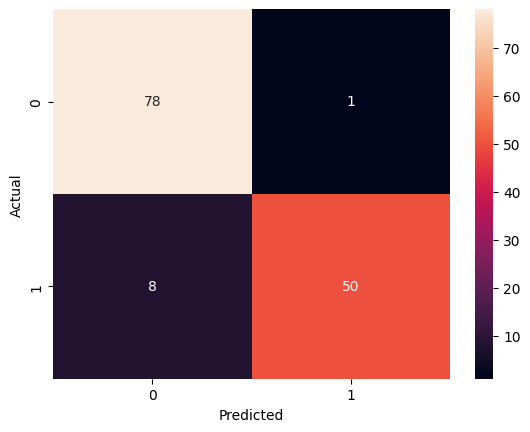

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- which n_neighbors argument may give you the best classification performance. We can try different n_neighbors (the K value) and check which K gives the best classification performance.
- Here we could try K from 1 to 50, and store the aggregated f1score for each k into a list.

In [58]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [59]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9273
2,0.8972
3,0.9558
4,0.9273
5,0.9464
6,0.9464
7,0.9464
8,0.9369
9,0.9464


Text(0.5, 1.0, 'KNN F1 Score')

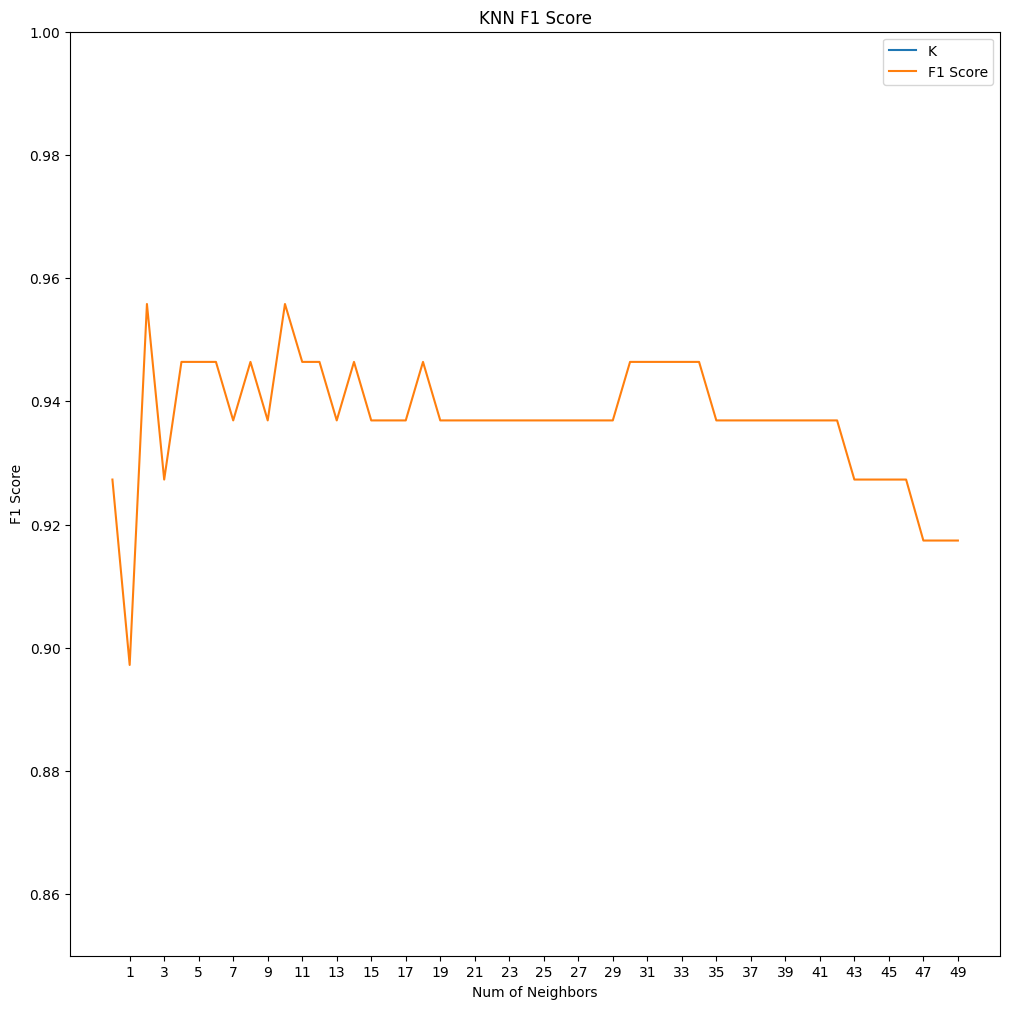

In [60]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

- As we can see from the F1 score linechart, the best K value is 5 with about 0.9691 f1score.

In [ ]:
## 9. Model Interpretation

In [ ]:
- The top features are: 'UnifSize',  'UnifShape', 'BareNuc', 'SingEpiSize'
- K value 5 has the highest performance


## 10. Model Deployment

- save model

In [62]:
#save model
import joblib
joblib.dump(knn, 'knn_Tumor_Model.pkl')

['knn_Tumor_Model.pkl']

- Load Model

In [63]:
 knn = joblib.load('knn_model.pkl')

## 11. Model Monitoring and Maintenance¶
- Monitor Performance: Regularly check the model's performance on new data.

## 12. Documentation and Reporting
- Documentation: Document all steps and decisions made.
- Reporting: Create visualizations and reports to communicate the findings.

#### Author:
    Meghan Beverly

#### Reference:
    IBM Merchine Learning Specialization Courses